In [2]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt

In [24]:
def Frozen_Lake_Experiments():
    # 0 = left; 1 = down; 2 = right;  3 = up

    environment  = 'FrozenLake-v0'
    env = gym.make(environment)
    env = env.unwrapped
    desc = env.unwrapped.desc

    time_array=[0]*10
    gamma_arr=[0]*10
    iters=[0]*10
    list_scores=[0]*10
#     ### POLICY ITERATION ####
#     print('POLICY ITERATION WITH FROZEN LAKE')
#     for i in range(0,10):
#         st=time.time()
#         best_policy,k = policy_iteration(env, gamma = (i+0.5)/10)
#         scores = evaluate_policy(env, best_policy, gamma = (i+0.5)/10)
#         end=time.time()
#         gamma_arr[i]=(i+0.5)/10
#         list_scores[i]=np.mean(scores)
#         iters[i] = k
#         time_array[i]=end-st


#     plt.plot(gamma_arr, time_array)
#     plt.xlabel('Gammas')
#     plt.title('Frozen Lake - Policy Iteration - Execution Time Analysis')
#     plt.ylabel('Execution Time (s)')
#     plt.grid()
# #     plt.show()

#     plt.plot(gamma_arr,list_scores)
#     plt.xlabel('Gammas')
#     plt.ylabel('Average Rewards')
#     plt.title('Frozen Lake - Policy Iteration - Reward Analysis')
#     plt.grid()
# #     plt.show()

#     plt.plot(gamma_arr,iters)
#     plt.xlabel('Gammas')
#     plt.ylabel('Iterations to Converge')
#     plt.title('Frozen Lake - Policy Iteration - Convergence Analysis')
#     plt.grid()
# #     plt.show()


#     ### VALUE ITERATION ###
#     print('VALUE ITERATION WITH FROZEN LAKE')
#     best_vals=[0]*10
#     for i in range(0,10):
#         st=time.time()
#         best_value,k = value_iteration(env, gamma = (i+0.5)/10)
#         policy = extract_policy(env,best_value, gamma = (i+0.5)/10)
#         policy_score = evaluate_policy(env, policy, gamma=(i+0.5)/10, n=1000)
#         gamma = (i+0.5)/10
#         plot = plot_policy_map('Frozen Lake Policy Map Iteration '+ str(i) + ' (Value Iteration) ' + 'Gamma: '+ str(gamma),policy.reshape(4,4),desc,colors_lake(),directions_lake())
#         end=time.time()
#         gamma_arr[i]=(i+0.5)/10
#         iters[i]=k
#         best_vals[i] = best_value
#         list_scores[i]=np.mean(policy_score)
#         time_array[i]=end-st


#     plt.plot(gamma_arr, time_array)
#     plt.xlabel('Gammas')
#     plt.title('Frozen Lake - Value Iteration - Execution Time Analysis')
#     plt.ylabel('Execution Time (s)')
#     plt.grid()
#     plt.show()

#     plt.plot(gamma_arr,list_scores)
#     plt.xlabel('Gammas')
#     plt.ylabel('Average Rewards')
#     plt.title('Frozen Lake - Value Iteration - Reward Analysis')
#     plt.grid()
#     plt.show()

#     plt.plot(gamma_arr,iters)
#     plt.xlabel('Gammas')
#     plt.ylabel('Iterations to Converge')
#     plt.title('Frozen Lake - Value Iteration - Convergence Analysis')
#     plt.grid()
#     plt.show()

#     plt.plot(gamma_arr,best_vals)
#     plt.xlabel('Gammas')
#     plt.ylabel('Optimal Value')
#     plt.title('Frozen Lake - Value Iteration - Best Value Analysis')
#     plt.grid()
#     plt.show()


    ### Q-LEARNING #####
    print('Q LEARNING WITH FROZEN LAKE')
    st = time.time()
    reward_array = []
    iter_array = []
    size_array = []
    chunks_array = []
    averages_array = []
    time_array = []
    Q_array = []
    for epsilon in [0.05,0.15,0.25,0.5,0.75,0.90]:
        Q = np.zeros((env.observation_space.n, env.action_space.n))
        rewards = []
        iters = []
        optimal=[0]*env.observation_space.n
        alpha = 0.85
        gamma = 0.95
        episodes = 30000
        environment  = 'FrozenLake-v0'
        env = gym.make(environment)
        env = env.unwrapped
        desc = env.unwrapped.desc
        for episode in range(episodes):
            state = env.reset()
            done = False
            t_reward = 0
            max_steps = 1000000
            for i in range(max_steps):
                if done:
                    break        
                current = state
                if np.random.rand() < (epsilon):
                    action = np.argmax(Q[current, :])
                else:
                    action = env.action_space.sample()

                state, reward, done, info = env.step(action)
                t_reward += reward
                Q[current, action] += alpha * (reward + gamma * np.max(Q[state, :]) - Q[current, action])
#             epsilon=(1-2.71**(-episode/1000))
            rewards.append(t_reward)
            iters.append(i)


        for k in range(env.observation_space.n):
            optimal[k]=np.argmax(Q[k, :])

        reward_array.append(rewards)
        iter_array.append(iters)
        Q_array.append(Q)

        env.close()
        end=time.time()
        #print("time :",end-st)
        time_array.append(end-st)

        # Plot results
        def chunk_list(l, n):
            for i in range(0, len(l), n):
                yield l[i:i + n]

        size = int(episodes / 50)
        chunks = list(chunk_list(rewards, size))
        averages = [sum(chunk) / len(chunk) for chunk in chunks]
        size_array.append(size)
        chunks_array.append(chunks)
        averages_array.append(averages)

    plt.plot(range(0, len(reward_array[0]), size_array[0]), averages_array[0],label='epsilon=0.05')
    plt.plot(range(0, len(reward_array[1]), size_array[1]), averages_array[1],label='epsilon=0.15')
    plt.plot(range(0, len(reward_array[2]), size_array[2]), averages_array[2],label='epsilon=0.25')
    plt.plot(range(0, len(reward_array[3]), size_array[3]), averages_array[3],label='epsilon=0.50')
    plt.plot(range(0, len(reward_array[4]), size_array[4]), averages_array[4],label='epsilon=0.75')
    plt.plot(range(0, len(reward_array[5]), size_array[5]), averages_array[5],label='epsilon=0.95')
    plt.legend()
    plt.xlabel('Iterations')
#     plt.grid()
#     plt.title('Frozen Lake - Q Learning - Decaying Epsilon')

    plt.title('Frozen Lake - Q Learning - Constant Epsilon')
    plt.ylabel('Average Reward')
    plt.savefig('ql.png')

    plt.show()

    plt.plot([0.05,0.15,0.25,0.5,0.75,0.95],time_array)
    plt.xlabel('Epsilon Values')
#     plt.grid()
    plt.title('Frozen Lake - Q Learning')
    plt.ylabel('Execution Time (s)')
    plt.show()

    plt.subplot(1,6,1)
    plt.title('Epsilon=0.05')
    plt.imshow(Q_array[0])

    plt.subplot(1,6,2)
    plt.title('Epsilon=0.15')
    plt.imshow(Q_array[1])

    plt.subplot(1,6,3)
    plt.title('Epsilon=0.25')
    plt.imshow(Q_array[2])

    plt.subplot(1,6,4)
    plt.title('Epsilon=0.50')
    plt.imshow(Q_array[3])

    plt.subplot(1,6,5)
    plt.title('Epsilon=0.75')
    plt.imshow(Q_array[4])

#     plt.subplot(1,6,6)
#     plt.title('Epsilon=0.95')
#     plt.imshow(Q_array[5])
    plt.colorbar()
#     plt.savefig('qtable.png')
    plt.show()


In [18]:
def run_episode(env, policy, gamma, render = True):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma , n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(env,v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma):
    v = np.zeros(env.nS)
    eps = 1e-5
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, is_done in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            break
    return v

def policy_iteration(env, gamma):
    policy = np.random.choice(env.nA, size=(env.nS))  
    max_iters = 200000
    desc = env.unwrapped.desc
    for i in range(max_iters):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(env,old_policy_v, gamma)
        if i % 2 == 0:
            plot = plot_policy_map('Frozen Lake Policy Map Iteration '+ str(i) + 'Gamma: ' + str(gamma),new_policy.reshape(4,4),desc,colors_lake(),directions_lake())
            a = 1
        if (np.all(policy == new_policy)):
            k=i+1
            break
        policy = new_policy
    return policy,k

def value_iteration(env, gamma):
    v = np.zeros(env.nS)  # initialize value-function
    max_iters = 100000
    eps = 1e-20
    desc = env.unwrapped.desc
    for i in range(max_iters):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + gamma*prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
#         if i % 50 == 0:
            plot = plot_policy_map('Frozen Lake Policy Map Iteration '+ str(i) + ' (Value Iteration) ' + 'Gamma: '+ str(gamma),v.reshape(4,4),desc,colors_lake(),directions_lake())
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            k=i+1
            break
    return v,k

def plot_policy_map(title, policy, map_desc, color_map, direction_map):
    fig = plt.figure()
    ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
    font_size = 'x-large'
    if policy.shape[1] > 16:
        font_size = 'small'
    plt.title(title)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            y = policy.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            p.set_facecolor(color_map[map_desc[i,j]])
            ax.add_patch(p)

            text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')


    plt.axis('off')
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.tight_layout()
    plt.savefig(title+str('.png'))
    plt.close()

    return (plt)


In [14]:
def Forest_Experiments():
    import mdptoolbox, mdptoolbox.example

#     print('POLICY ITERATION WITH FOREST MANAGEMENT')
#     P, R = mdptoolbox.example.forest(S=2000)
#     value_f = [0]*10
#     policy = [0]*10
#     iters = [0]*10
#     time_array = [0]*10
#     gamma_arr = [0] * 10
#     for i in range(0,10):
#         pi = mdptoolbox.mdp.PolicyIteration(P, R, (i+0.5)/10)
#         pi.run()
#         gamma_arr[i]=(i+0.5)/10
#         value_f[i] = np.mean(pi.V)
#         policy[i] = pi.policy
#         iters[i] = pi.iter
#         time_array[i] = pi.time


#     plt.plot(gamma_arr, time_array)
#     plt.xlabel('Gammas')
#     plt.title('Forest Management - Policy Iteration - Execution Time Analysis')
#     plt.ylabel('Execution Time (s)')
#     plt.grid()
# #     plt.show()


#     plt.plot(gamma_arr,value_f)
#     plt.xlabel('Gammas')
#     plt.ylabel('Average Rewards')
#     plt.title('Forest Management - Policy Iteration - Reward Analysis')
#     plt.grid()
# #     plt.show()

#     plt.plot(gamma_arr,iters)
#     plt.xlabel('Gammas')
#     plt.ylabel('Iterations to Converge')
#     plt.title('Forest Management - Policy Iteration - Convergence Analysis')
#     plt.grid()
# #     plt.show()

#     print('VALUE ITERATION WITH FOREST MANAGEMENT')
#     P, R = mdptoolbox.example.forest(S=2000)
#     value_f = [0]*10
#     policy = [0]*10
#     iters = [0]*10
#     time_array = [0]*10
#     gamma_arr = [0] * 10
#     for i in range(0,10):
#         pi = mdptoolbox.mdp.ValueIteration(P, R, (i+0.5)/10)
#         pi.run()
#         gamma_arr[i]=(i+0.5)/10
#         value_f[i] = np.mean(pi.V)
#         policy[i] = pi.policy
#         iters[i] = pi.iter
#         time_array[i] = pi.time


#     plt.plot(gamma_arr, time_array)
#     plt.xlabel('Gammas')
#     plt.title('Forest Management - Value Iteration - Execution Time Analysis')
#     plt.ylabel('Execution Time (s)')
#     plt.grid()
#     #plt.show()

#     plt.plot(gamma_arr,value_f)
#     plt.xlabel('Gammas')
#     plt.ylabel('Average Rewards')
#     plt.title('Forest Management - Value Iteration - Reward Analysis')
#     plt.grid()
#     #plt.show()

#     plt.plot(gamma_arr,iters)
#     plt.xlabel('Gammas')
#     plt.ylabel('Iterations to Converge')
#     plt.title('Forest Management - Value Iteration - Convergence Analysis')
#     plt.grid()
#     #plt.show()

    print('Q LEARNING WITH FOREST MANAGEMENT')
    P, R = mdptoolbox.example.forest(S=2000,p=0.01)
    value_f = []
    policy = []
    iters = []
    time_array = []
    Q_table = []
    rew_array = []
    for epsilon in [0.05,0.15,0.25,0.5,0.75,0.95]:
        st = time.time()
        pi = mdptoolbox.mdp.QLearning(P,R,0.95)
        end = time.time()
        pi.run()
#         print(pi)
#         pi.run(epsilon)
        rew_array.append(pi.R)
        value_f.append(np.mean(pi.V))
        
        policy.append(pi.policy)
        time_array.append(end-st)
        Q_table.append(pi.Q)

#     plt.plot(range(0,10000), rew_array[0],label='epsilon=0.05')
#     plt.plot(range(0,10000), rew_array[1],label='epsilon=0.15')
#     plt.plot(range(0,10000), rew_array[2],label='epsilon=0.25')
#     plt.plot(range(0,10000), rew_array[3],label='epsilon=0.50')
#     plt.plot(range(0,10000), rew_array[4],label='epsilon=0.75')
#     plt.plot(range(0,10000), rew_array[5],label='epsilon=0.95')
    plt.plot(range(0, len(rew_array[0]), size_array[0]), averages_array[0],label='epsilon=0.05')
    plt.plot(range(0, len(rew_array[1]), size_array[1]), averages_array[1],label='epsilon=0.15')
    plt.plot(range(0, len(rew_array[2]), size_array[2]), averages_array[2],label='epsilon=0.25')
    plt.plot(range(0, len(rew_array[3]), size_array[3]), averages_array[3],label='epsilon=0.50')
    plt.plot(range(0, len(rew_array[4]), size_array[4]), averages_array[4],label='epsilon=0.75')
    plt.plot(range(0, len(rew_array[5]), size_array[5]), averages_array[5],label='epsilon=0.95')
    
    plt.legend()
    plt.xlabel('Iterations')
    plt.grid()
    plt.title('Forest Management - Q Learning - Decaying Epsilon')
    plt.ylabel('Average Reward')
#     plt.show()

    plt.subplot(1,6,1)
    plt.imshow(Q_table[0][:20,:])
    plt.title('Epsilon=0.05')

    plt.subplot(1,6,2)
    plt.title('Epsilon=0.15')
    plt.imshow(Q_table[1][:20,:])

    plt.subplot(1,6,3)
    plt.title('Epsilon=0.25')
    plt.imshow(Q_table[2][:20,:])

    plt.subplot(1,6,4)
    plt.title('Epsilon=0.50')
    plt.imshow(Q_table[3][:20,:])

    plt.subplot(1,6,5)
    plt.title('Epsilon=0.75')
    plt.imshow(Q_table[4][:20,:])

    plt.subplot(1,6,6)
    plt.title('Epsilon=0.95')
    plt.imshow(Q_table[5][:20,:])
    plt.colorbar()
    plt.show()

    return

def colors_lake():
    return {
        b'S': 'green',
        b'F': 'skyblue',
        b'H': 'black',
        b'G': 'gold',
    }

def directions_lake():
    return {
        3: '⬆',
        2: '➡',
        1: '⬇',
        0: '⬅'
    }

def actions_taxi():
    return {
        0: '⬇',
        1:'⬆',
        2: '➡',
        3: '⬅',
        4: 'P',
        5: 'D'
    }

def colors_taxi():
    return {
        b'+': 'red',
        b'-': 'green',
        b'R': 'yellow',
        b'G': 'blue',
        b'Y': 'gold'
    }

print('STARTING EXPERIMENTS')
# Frozen_Lake_Experiments()
# Forest_Experiments()
# #Taxi_Experiments()
# print('END OF EXPERIMENTS')



STARTING EXPERIMENTS


Q LEARNING WITH FROZEN LAKE


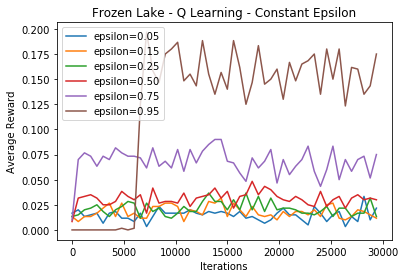

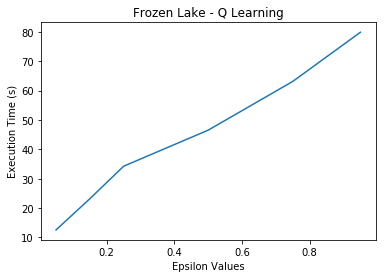

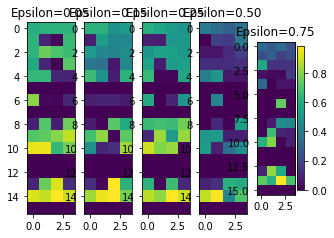

In [26]:
Frozen_Lake_Experiments()
# Forest_Experiments()